# Logistic Regression

### 1. Upload Titanic dataset

In [5]:
import pandas as pd
data= pd.read_csv("./titanic-passengers.csv", sep=";")
print(data.describe())
data.head()


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### 2. Preprocessing

In [10]:
print("statistic of nan values: ", data.isna().sum())

statistic of nan values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
#deleting Cabin column, and Age and Embareked nan rows
data.drop(columns=["Cabin"], axis=1, inplace=True)
data.dropna(axis="rows",subset=["Age"], inplace=True)
data.dropna(axis="rows",subset=["Embarked"], inplace=True)

In [22]:
#Transform catagorical data into numerical using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Embarked'] = labelencoder.fit_transform(data['Embarked'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['Survived'] = labelencoder.fit_transform(data['Survived'])
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,3101276,7.9250,2
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,358585,14.5000,2
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,0
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,A/5 21173,7.2500,2
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26.0000,2


### 3. Applying logistic regresion

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#the fouth feature were be choosen based on the data viz checkpoint where 
#they have a stong relationship between them and Survived target
x=data[["Age", "Sex", "Pclass", "Embarked"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.80


### 4. Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import numpy as np


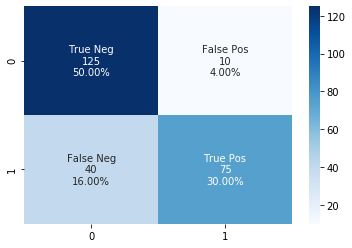

In [35]:
cf_matrix=confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

### from the confusion matrix we can see that 80% of the prediction are true so the model obtained by logistic regression give nearly  good results!


###  5. ROC AUC

ROC(Receiver Characteristic Operator) curve is an evaluation metric for binary classification(but it can be extented to evaluate multi class classification)  
ROC is a probability curve that plots TPR against the FPR at various threshold values.
the AUC(Area Under the Curve) measure the ability of the model to make good prediction and distinguish well between the different classes and detect more numbers of True positives and True negatives than False negatives and False positives.


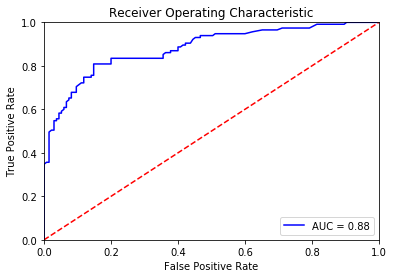

In [41]:
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


the AUC is 0.88 our regression model has a height ability to make a good classification 